In [1]:
#!pip install scikit-learn matplotlib nltk pandas 
#!pip install pdfminer pdfminer3k pdfminer.six
#!pip install wordcloud

In [2]:
from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfpage import PDFTextExtractionNotAllowed
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfdevice import PDFDevice
from pdfminer.layout import LTTextBoxHorizontal,LAParams
from pdfminer.converter import PDFPageAggregator

from os.path import join as pjoin
import os
import os.path
import re
import sys
import codecs
 
#文献文件夹的相对路径
pdf_dir = './pdf_folder'
 
#把目录下的文件名全部获取保存在files中
file_names = os.listdir(pdf_dir)

In [3]:
# 删除保存txt的文件夹当中的所有文件，防止论文写入同名txt文件的结尾
old_text_path = "./pdf_text_folder"
del_list = os.listdir(old_text_path)
if del_list:

    for del_file in del_list:
        os.remove(pjoin(old_text_path, del_file))
        print(f"remove file {del_file}")
else:
    print("no file to remove")

no file to remove


In [4]:
file_names

['2015-NIPS-ConvLstm-Convolutional LSTM Network_ A Machine Learning Approach for Precipitation Nowcasting.pdf',
 '2017-AAAI-STResNet-Deep Spatio-Temporal Residual Networks for Citywide Crowd Flows Prediction.pdf',
 '2017-ICLR-GCN_3-Semi-Supervised Classification with Graph Convolutional Networks.pdf',
 '2017-IEEE_CVPR-Geometric Deep Learning on Graphs and Manifolds Using Mixture Model CNNs.pdf',
 '2017-NIPS-TrajGRU-Deep Learning for Precipitation Nowcasting A Benchmark and A New Model.pdf',
 '2018-AAAI-DMVST_Net-Deep Multi-View Spatial-Temporal Network for Taxi Demand Prediction.pdf',
 '2018-NIPS-graph_represent-Hierarchical graph representation learning with differentiable pooling.pdf',
 '2019-AAAI-ST_MGCN-Spatiotemporal Multi-Graph Convolution Network for Ride-Hailing Demand Forecasting.pdf',
 '2019-IEEE_TITS-ST3DNet-Deep Spatial–Temporal 3D Convolutional Neural Networks for Traffic Data Forecasting.pdf',
 '2020-AAAI-SA_ConvLSTM-Self-Attention ConvLSTM for Spatiotemporal Prediction.p

In [5]:

def PdfReader(pdf_dir, pdf_name):

    pdf_path = pjoin(pdf_dir, pdf_name)

    password = ''
 
    #打开pdf文件
    fp = open(pdf_path,'rb')
 
    #从文件句柄创建一个pdf解析对象
    parser = PDFParser(fp)
    
    #创建pdf文档对象，存储文档结构
    document = PDFDocument(parser,password)
    
    #创建一个pdf资源管理对象，存储共享资源
    rsrcmgr = PDFResourceManager()

    laparams = LAParams()
    #创建一个device对象
    device = PDFPageAggregator(rsrcmgr, laparams=laparams)
    #创建一个翻译器
    interpreter = PDFPageInterpreter(rsrcmgr, device)

    for page in PDFPage.create_pages(document):
        interpreter.process_page(page)
        # receive the LTPage object for the page.
        layout = device.get_result()
        for x in layout:
            if (isinstance(x, LTTextBoxHorizontal)):
                        # 文献文本文件名称
                        pdf_text_path = "./pdf_text_folder/" + pdf_name[:-4] + '.txt'
                        # 需要写出编码格式
                        with open((pdf_text_path), 'a',encoding='utf-8') as f:
                            results = x.get_text()
                            f.write(results + '\n')

In [6]:
for pdf_name in file_names:
    PdfReader(pdf_dir, pdf_name)

In [7]:
# 保存获取到的文本信息
pdf_texts = []
for file_name in file_names:
    text_file_name = file_name[:-4] + ".txt"
    with open(pjoin("./pdf_text_folder", text_file_name), encoding='utf-8') as f:
        text = f.readlines()
        text = "".join(text)
        pdf_texts.append("".join(text))

In [8]:
from nltk.text import TextCollection
from nltk.tokenize import word_tokenize
import nltk

from nltk.corpus import stopwords

In [9]:

import string
tokens = []
# 去除数字/标点符号/停用词/论文专用词
for text in pdf_texts:
    # 首先拼接分行的英文单词
    text = text.replace("-\n", "")
    # 处理拼接英文单词
    text = text.replace("-", "")
    # 文本按行拼接为一个长字符串
    text = text.replace("\n", " ")
    # 转换大小写
    text = text.lower()
    # 去除数字
    for number in "0123456789":
        text = text.replace(number, "")
    # 去除标点符号
    for punc in string.punctuation:
        text = text.replace(punc, " ")
    # 分词
    text = word_tokenize(text)
    text = [w for w in text if w not in stopwords.words('english')+["cid","et","al"] + list(string.ascii_lowercase)]
    tokens.append(text)

In [10]:
tokens[0][:20]

['convolutional',
 'lstm',
 'network',
 'machine',
 'learning',
 'approach',
 'precipitation',
 'nowcasting',
 'xingjian',
 'shi',
 'zhourong',
 'chen',
 'hao',
 'wang',
 'dityan',
 'yeung',
 'department',
 'computer',
 'science',
 'engineering']

TF: Term Frequency 词频（当前文章中词语的频率）

IDF: Inverse Document Frequency 逆文本频率指数 （在一个包含许多文档的文档库中，某个词语是否常见，IDF值越大越不常见）

In [11]:
# 计算所有文章的词频
all_tokens = []
for token in tokens:
    all_tokens+=token
Freq_Dist = nltk.FreqDist(all_tokens)
Freq_Dist

FreqDist({'trafﬁc': 583, 'data': 426, 'model': 417, 'graph': 416, 'network': 369, 'prediction': 361, 'learning': 326, '–': 265, 'time': 262, 'neural': 240, ...})

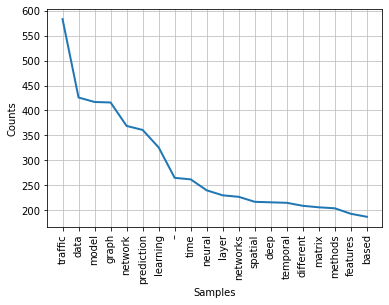

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [12]:
#词频图
Freq_Dist.plot(20,cumulative=False)

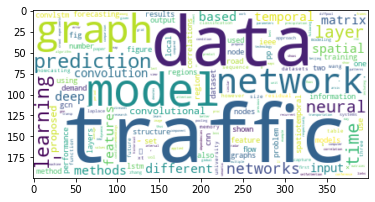

In [13]:
# 词频云图
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color='white')
freq_word = dict(Freq_Dist.most_common())
wordcloud.fit_words(freq_word)
plt.imshow(wordcloud, interpolation="bilinear")
# 调用show展示图片
plt.show()

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
# 多个文档构成的列表
documents = [" ".join(token) for token in tokens]
tf_idf_vectorizer = TfidfVectorizer()
# 构造词频矩阵
tf_idf = tf_idf_vectorizer.fit_transform(documents)
# 获取特征词
feature_names = tf_idf_vectorizer.get_feature_names()
# 词频矩阵
matrix = tf_idf.toarray()
df = pd.DataFrame(matrix,columns=feature_names)

D:\Anaconda\envs\crawler\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
df

,aaai,aaron,aasa,abadi,abdelzaher,abdulsaboor,abilities,ability,ablation,able,...,ﬁxes,ﬂat,ﬂatten,ﬂaw,ﬂeet,ﬂexibility,ﬂexible,ﬂight,ﬂow,ﬂows
0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.005416,0.000000,0.016249,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074822,0.000000
1,0.014811,0.000000,0.000000,0.017040,0.00000,0.000000,0.000000,0.005809,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067581,0.144420
2,0.004103,0.000000,0.000000,0.021245,0.00000,0.009335,0.000000,0.000000,0.000000,0.004829,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006356,0.000000,0.003511,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003670,0.000000
4,0.000000,0.019013,0.000000,0.000000,0.00000,0.000000,0.000000,0.019670,0.000000,0.014753,...,0.009507,0.000000,0.000000,0.000000,0.000000,0.000000,0.006473,0.019013,0.050054,0.004528
5,0.032024,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.009421,...,0.000000,0.000000,0.009107,0.000000,0.000000,0.000000,0.000000,0.000000,0.017124,0.004337
6,0.002712,0.000000,0.006169,0.000000,0.00000,0.000000,0.000000,0.003191,0.000000,0.006382,...,0.000000,0.018506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.040877,0.000000,0.000000,0.014110,0.00000,0.000000,0.000000,0.000000,0.000000,0.033672,...,0.000000,0.000000,0.000000,0.000000,0.009299,0.000000,0.000000,0.000000,0.010492,0.013287
8,0.002314,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.008168,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003584,0.000000,0.027713,0.035095
9,0.015137,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.008906,0.051652,0.008906,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.008609,0.011724,0.000000,0.032376,0.008200


In [16]:
from sklearn.decomposition import LatentDirichletAllocation
# 指定 lda 主题数
n_topics = 10
lda = LatentDirichletAllocation(
    n_components=n_topics, max_iter=50,
    learning_method='online',
    learning_offset=50.,
    random_state=0)
print(lda)
# fit LDA模型
lda.fit(tf_idf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=50, random_state=0)


LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=50, random_state=0)

In [17]:
lda.components_

array([[0.18686401, 0.17361695, 0.18601485, ..., 0.16656315, 0.17186546,
        0.17078328],
       [0.16346027, 0.17040901, 0.18046837, ..., 0.18442251, 0.16881869,
        0.17680281],
       [0.17770621, 0.18112867, 0.17679304, ..., 0.15882102, 0.16589385,
        0.15716185],
       ...,
       [0.17262566, 0.16323996, 0.16046868, ..., 0.17577461, 0.17251662,
        0.15379828],
       [0.18129283, 0.17003251, 0.17448795, ..., 0.17571558, 0.17109191,
        0.17199599],
       [0.16338544, 0.15961706, 0.15921711, ..., 0.17833907, 0.18170796,
        0.17579184]])

In [18]:
import numpy as np
def top_words(lda, feature_names, num_words):
    topic_word_dict = dict()
    for topic_idx, component in enumerate(lda.components_):
        top_words = np.array(feature_names)[np.argsort(component)[-num_words:]]
        topic_word_dict[topic_idx] = top_words

    return topic_word_dict
# 计算每个主题下的top关键词
topic_word_dict = top_words(lda, feature_names, 10)


In [19]:
topic_word_dict

{0: array(['propose', 'size', 'researcher', 'trafﬁc', 'extracting',
        'reorganizing', 'predrnn', 'fall', 'selfattention', 'saconvlstm'],
       dtype='<U64'),
 1: array(['schemes', 'ughi', 'stanford', 'template', 'true', 'district',
        'anatomical', 'predcnn', 'captured', 'ofﬂine'], dtype='<U64'),
 2: array(['visualizes', 'prove', 'randomly', 'graph', 'cora', 'complex',
        'schematic', 'chronologically', 'manifolds', 'dhillon'],
       dtype='<U64'),
 3: array(['displayed', 'khosla', 'swirlsan', 'network', 'inﬂow', 'according',
        'serve', 'lei', 'jorge', 'importance'], dtype='<U64'),
 4: array(['node', 'nodes', 'gnns', 'hierarchical', 'clusters', 'cluster',
        'assignment', 'graph', 'gnn', 'diffpool'], dtype='<U64'),
 5: array(['contains', 'tkipf', 'investigated', 'extrapolation',
        'sorkinehornung', 'standard', 'limitations', 'may', 'around',
        'survey'], dtype='<U64'),
 6: array(['demand', 'time', 'temporal', 'learning', 'network', 'prediction',

In [20]:
tokens

[['convolutional',
  'lstm',
  'network',
  'machine',
  'learning',
  'approach',
  'precipitation',
  'nowcasting',
  'xingjian',
  'shi',
  'zhourong',
  'chen',
  'hao',
  'wang',
  'dityan',
  'yeung',
  'department',
  'computer',
  'science',
  'engineering',
  'hong',
  'kong',
  'university',
  'science',
  'technology',
  'xshiab',
  'zchenbb',
  'hwangaz',
  'dyyeung',
  'cse',
  'ust',
  'hk',
  'waikin',
  'wong',
  'wangchun',
  'woo',
  'hong',
  'kong',
  'observatory',
  'hong',
  'kong',
  'china',
  'wkwong',
  'wcwoo',
  'hko',
  'gov',
  'hk',
  'abstract',
  'goal',
  'precipitation',
  'nowcasting',
  'predict',
  'future',
  'rainfall',
  'intensity',
  'local',
  'region',
  'relatively',
  'short',
  'period',
  'time',
  'previous',
  'studies',
  'examined',
  'crucial',
  'challenging',
  'weather',
  'forecasting',
  'problem',
  'machine',
  'learning',
  'perspective',
  'paper',
  'formulate',
  'precipitation',
  'nowcasting',
  'spatiotemporal',
  'se